In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Add the parent directory to the system path
import os 
import sys 
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts
import scripts.visualization as v

In [4]:
# load population data from data
df = pd.read_csv('../data/population_data.csv')

In [5]:
df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.858849,50.850191,50.845065,50.836016,50.826773,...,52.515590,52.589275,52.657475,52.723376,52.787792,52.849439,52.890182,52.873650,52.864860,52.904203
1,1,Africa Eastern and Southern,AFE,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.387880,50.388814,50.391276,50.395656,50.400512,...,50.559167,50.531940,50.518935,50.515859,50.504887,50.495993,50.486544,50.478916,50.472347,50.464214
2,2,Afghanistan,AFG,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,48.083054,48.165001,48.242372,48.315893,48.385273,...,49.432135,49.423184,49.414608,49.419284,49.437209,49.455485,49.470944,49.488405,49.508722,49.527063
3,3,Africa Western and Central,AFW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.179683,50.194408,50.203157,50.203679,50.204549,...,49.807914,49.796591,49.783515,49.770292,49.758369,49.747269,49.738956,49.732453,49.725969,49.719851
4,4,Angola,AGO,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,49.843790,49.700946,49.673797,49.634980,49.576791,...,50.671632,50.657496,50.642098,50.625719,50.611615,50.598879,50.588558,50.580794,50.572443,50.563065


In [6]:
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [7]:
unique_values_list = df_cleaned['Indicator Code'].unique().tolist()
unique_values_list

['SP.POP.TOTL.FE.ZS',
 'SP.POP.TOTL.MA.ZS',
 'SP.RUR.TOTL.ZS',
 'SP.URB.TOTL.IN.ZS',
 'SP.POP.TOTL.FE.IN',
 'SP.POP.TOTL.MA.IN',
 'EN.URB.LCTY',
 'SP.RUR.TOTL',
 'SP.POP.TOTL',
 'SP.URB.TOTL']

Extract top ten countries based on population

In [8]:
# List of aggregate region codes to exclude
# Comprehensive list of aggregate region codes to exclude
exclude_codes = [
    'WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'EAR', 'LMC', 'UMC', 'EAS', 'LTE', 'EAP', 'TEA', 'SAS', 
    'TSA', 'IDA', 'HIC', 'OED', 'IDX', 'TSS', 'SSF', 'SSA', 'LDC', 'PST', 'PRE', 'FCS', 'ECS', 
    'HPC', 'AFE', 'LIC', 'LCN', 'TLA', 'IDB', 'LAC', 'AFW', 'AFR', 'ARB', 'CEB', 'CSS', 'ECA', 
    'EMU', 'EUU', 'MEA', 'NAC', 'NOC', 'SST', 'WLD', 'TEC', 'MNA', 'TMN'
]

# Filter data for total population
df = df_cleaned[(~df_cleaned['Country Code'].isin(exclude_codes))]
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,5.085885e+01,5.085019e+01,5.084507e+01,5.083602e+01,5.082677e+01,5.082338e+01,...,5.251559e+01,5.258927e+01,5.265747e+01,5.272338e+01,5.278779e+01,5.284944e+01,5.289018e+01,5.287365e+01,5.286486e+01,5.290420e+01
2,Afghanistan,AFG,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,4.808305e+01,4.816500e+01,4.824237e+01,4.831589e+01,4.838527e+01,4.845029e+01,...,4.943213e+01,4.942318e+01,4.941461e+01,4.941928e+01,4.943721e+01,4.945549e+01,4.947094e+01,4.948840e+01,4.950872e+01,4.952706e+01
4,Angola,AGO,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,4.984379e+01,4.970095e+01,4.967380e+01,4.963498e+01,4.957679e+01,4.948834e+01,...,5.067163e+01,5.065750e+01,5.064210e+01,5.062572e+01,5.061161e+01,5.059888e+01,5.058856e+01,5.058079e+01,5.057244e+01,5.056307e+01
5,Albania,ALB,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,4.879712e+01,4.876944e+01,4.873435e+01,4.869136e+01,4.864293e+01,4.859271e+01,...,4.983770e+01,4.984241e+01,4.985656e+01,4.987853e+01,4.990607e+01,4.993933e+01,4.998805e+01,5.004904e+01,5.011774e+01,5.018837e+01
6,Andorra,AND,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,4.945462e+01,4.923649e+01,4.904667e+01,4.884703e+01,4.866036e+01,4.849222e+01,...,4.952877e+01,4.955956e+01,4.950786e+01,4.937362e+01,4.924880e+01,4.912304e+01,4.901416e+01,4.893211e+01,4.890509e+01,4.892743e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,Samoa,WSM,Urban population,SP.URB.TOTL,2.145000e+04,2.217900e+04,2.290400e+04,2.362300e+04,2.433000e+04,2.505100e+04,...,3.863400e+04,3.850300e+04,3.839800e+04,3.831200e+04,3.825600e+04,3.826200e+04,3.844900e+04,3.881300e+04,3.917500e+04,3.951200e+04
2526,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,5.043640e+05,5.341180e+05,5.656150e+05,5.986780e+05,6.340590e+05,6.722880e+05,...,9.481916e+06,9.917199e+06,1.036124e+07,1.081719e+07,1.128226e+07,1.175840e+07,1.223824e+07,1.271310e+07,1.320503e+07,1.372171e+07
2527,South Africa,ZAF,Urban population,SP.URB.TOTL,7.701664e+06,7.949880e+06,8.210020e+06,8.483449e+06,8.768384e+06,9.065565e+06,...,3.519767e+07,3.622362e+07,3.686688e+07,3.729824e+07,3.804772e+07,3.883468e+07,3.960545e+07,4.029586e+07,4.092849e+07,4.157665e+07
2528,Zambia,ZMB,Urban population,SP.URB.TOTL,5.660210e+05,6.101180e+05,6.575400e+05,7.107080e+05,7.799390e+05,8.549530e+05,...,6.512613e+06,6.809146e+06,7.115902e+06,7.434012e+06,7.762359e+06,8.100644e+06,8.447250e+06,8.800295e+06,9.160288e+06,9.530988e+06


### Distribution of population, considering total population

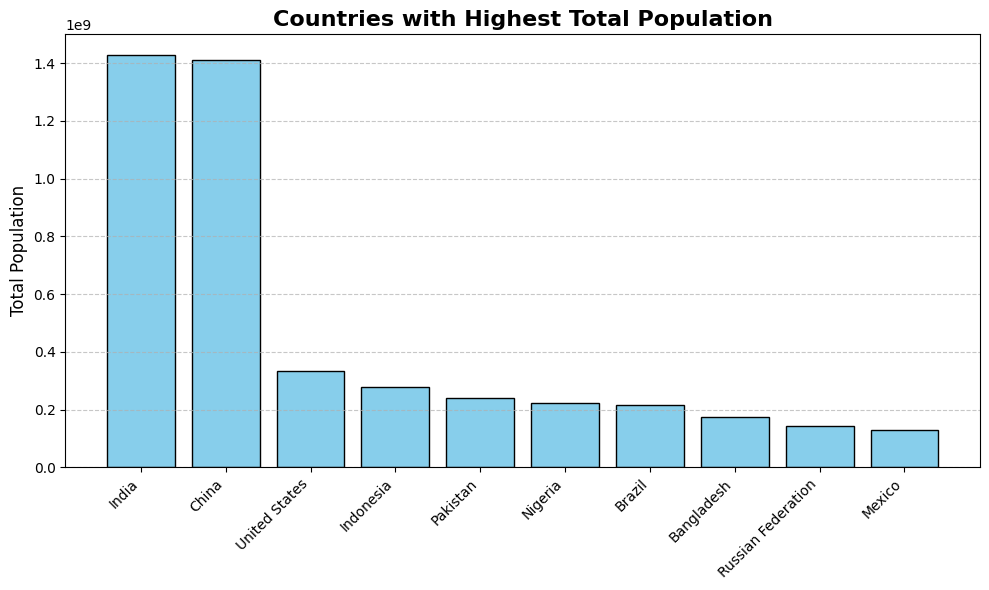

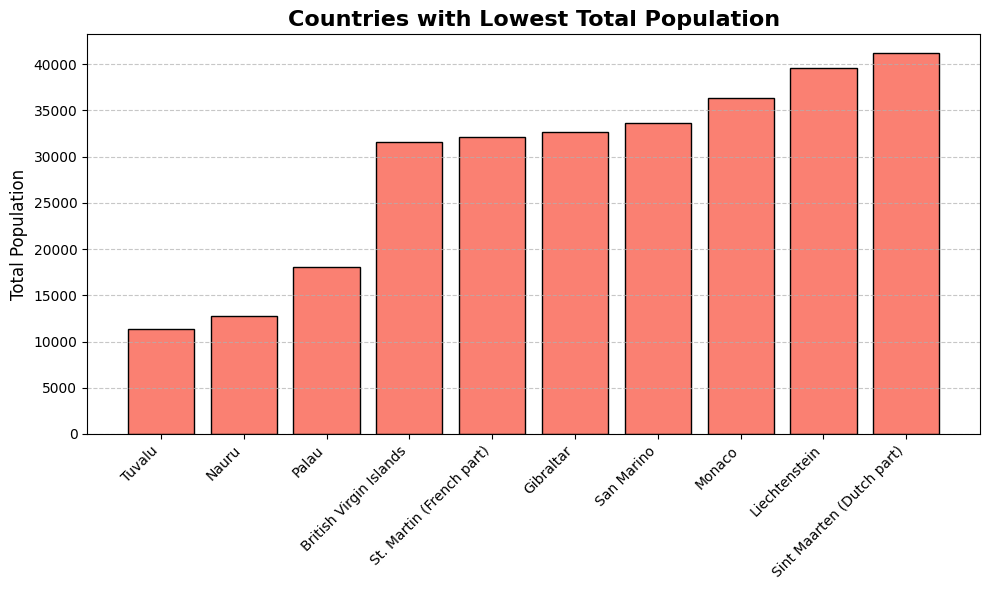

In [9]:
# Data for countries with highest total population
highest_population = df[df['Indicator Code'] == 'SP.POP.TOTL'].nlargest(10, '2023')[['Country Name', '2023']]
highest_population.columns = ['Country', 'Population']

# Data for countries with lowest total population
lowest_population = df[df['Indicator Code'] == 'SP.POP.TOTL'].nsmallest(10, '2023')[['Country Name', '2023']]
lowest_population.columns = ['Country', 'Population']

# Plotting the data
v.plot_population(highest_population, 'Countries with Highest Total Population', color='skyblue', edgecolor='black')
v.plot_population(lowest_population, 'Countries with Lowest Total Population', color='salmon', edgecolor='black')

### Distribution of Urban and Rural population

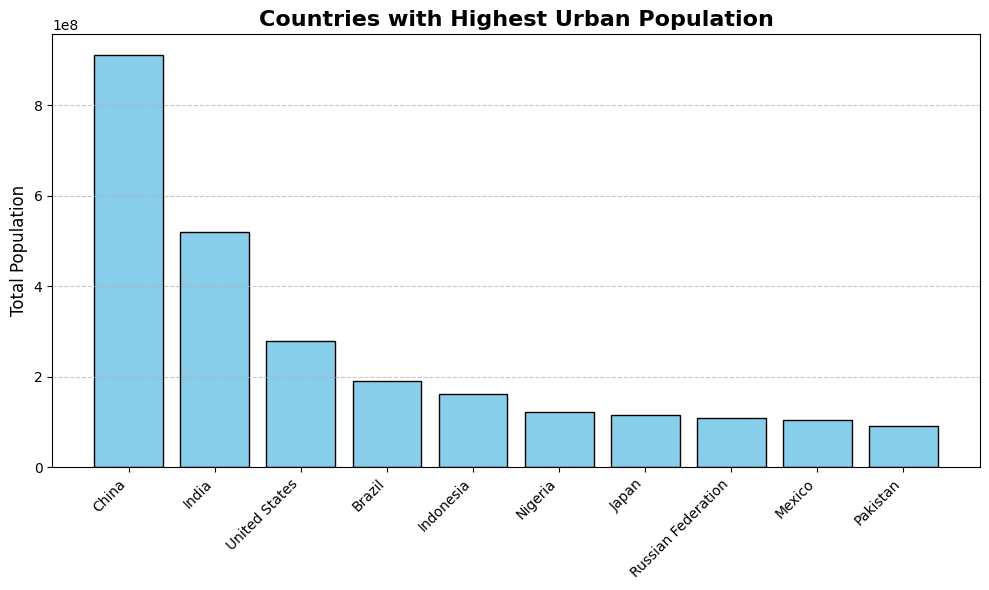

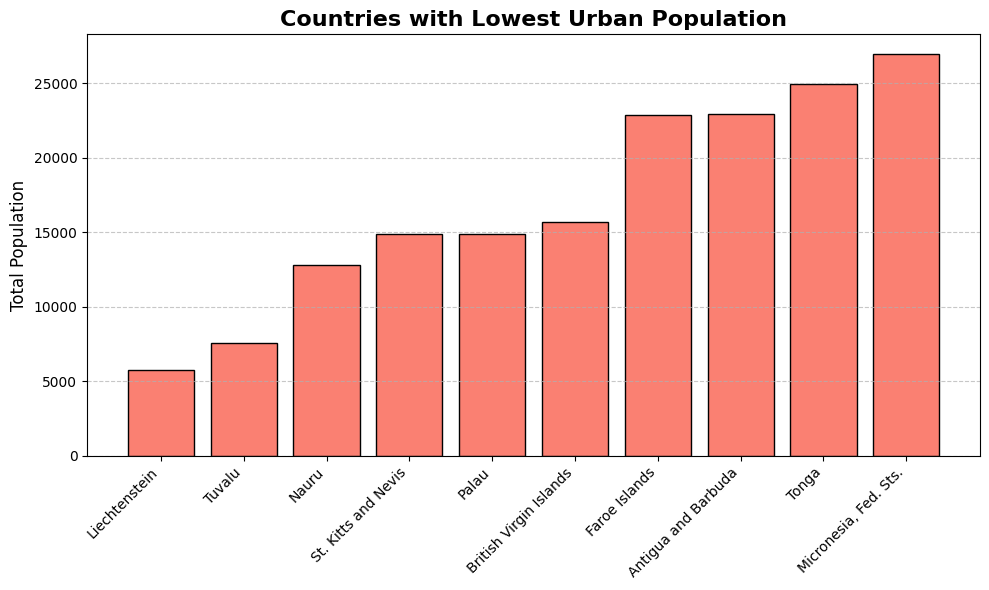

In [10]:
# Data for countries with highest total population
highest_population = df[df['Indicator Code'] == 'SP.URB.TOTL'].nlargest(10, '2023')[['Country Name', '2023']]
highest_population.columns = ['Country', 'Population']

# Data for countries with lowest total population
lowest_population = df[df['Indicator Code'] == 'SP.URB.TOTL'].nsmallest(10, '2023')[['Country Name', '2023']]
lowest_population.columns = ['Country', 'Population']

# Plotting the data
v.plot_population(highest_population, 'Countries with Highest Urban Population', color='skyblue', edgecolor='black')
v.plot_population(lowest_population, 'Countries with Lowest Urban Population', color='salmon', edgecolor='black')

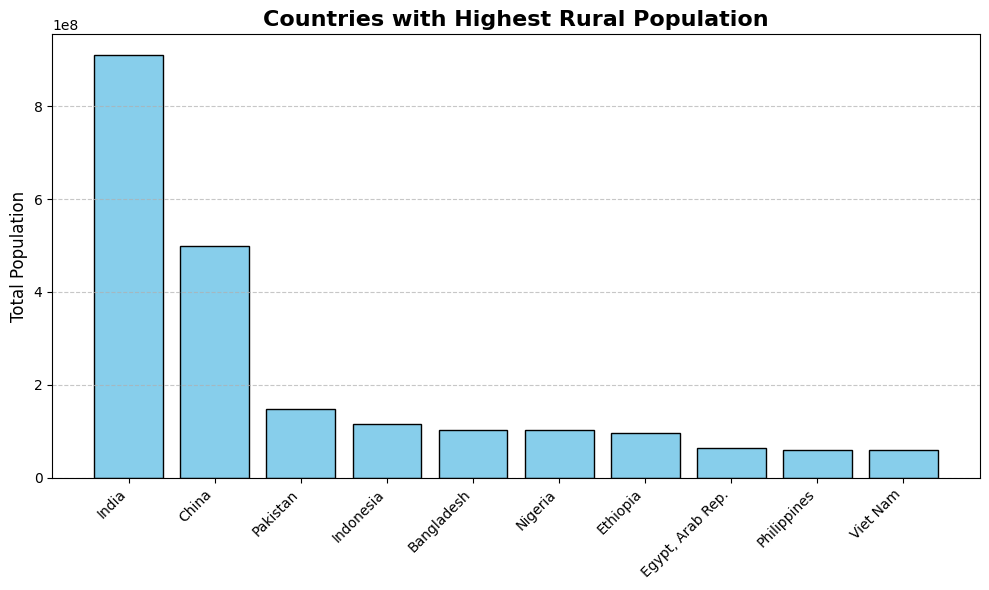

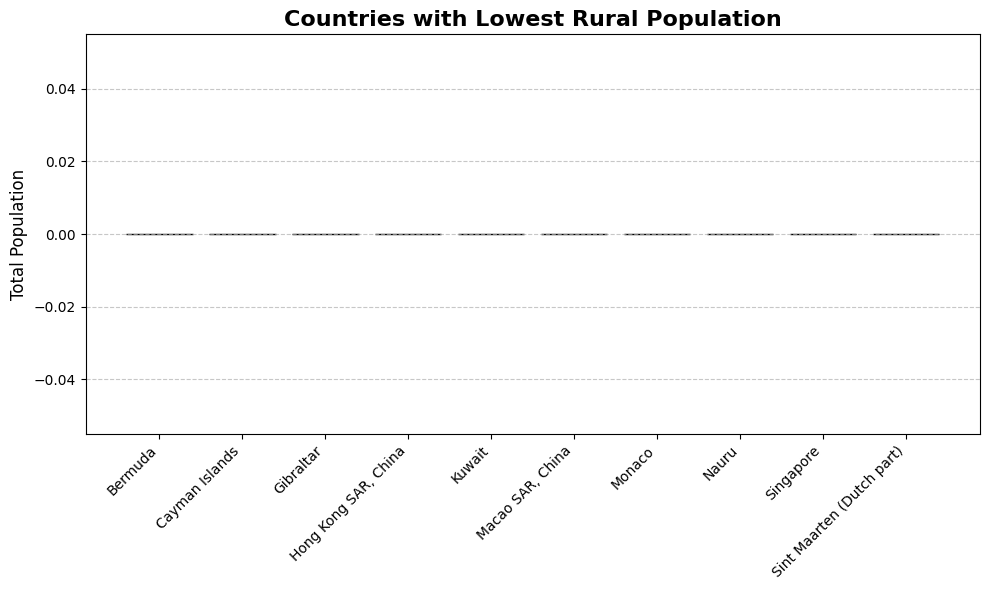

In [11]:
# Data for countries with highest total population
highest_population = df[df['Indicator Code'] == 'SP.RUR.TOTL'].nlargest(10, '2023')[['Country Name', '2023']]
highest_population.columns = ['Country', 'Population']

# Data for countries with lowest total population
lowest_population = df[df['Indicator Code'] == 'SP.RUR.TOTL'].nsmallest(10, '2023')[['Country Name', '2023']]
lowest_population.columns = ['Country', 'Population']

# Plotting the data
v.plot_population(highest_population, 'Countries with Highest Rural Population', color='skyblue', edgecolor='black')
v.plot_population(lowest_population, 'Countries with Lowest Rural Population', color='salmon', edgecolor='black')

### Distribution Gender in a Population

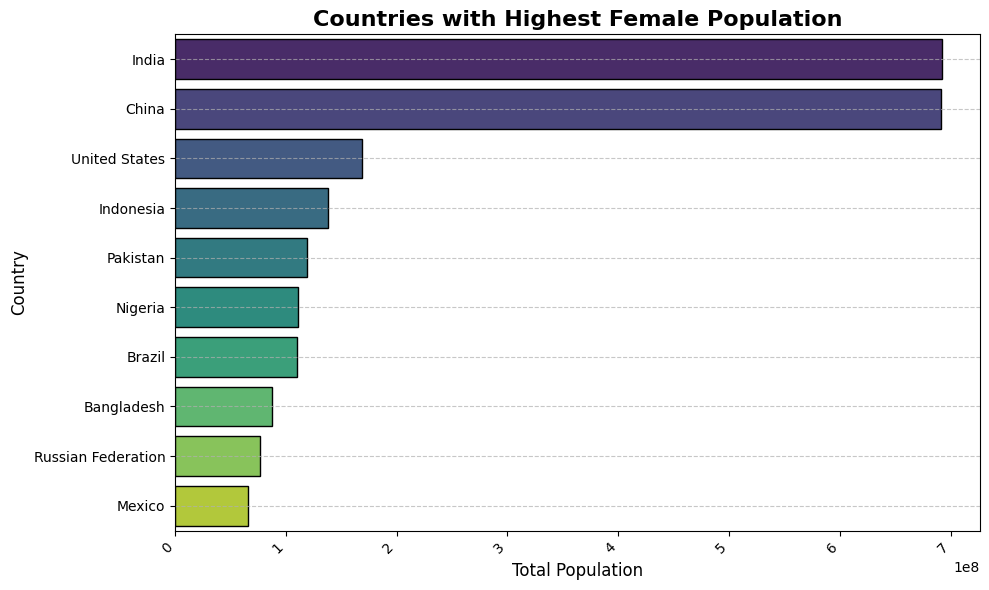

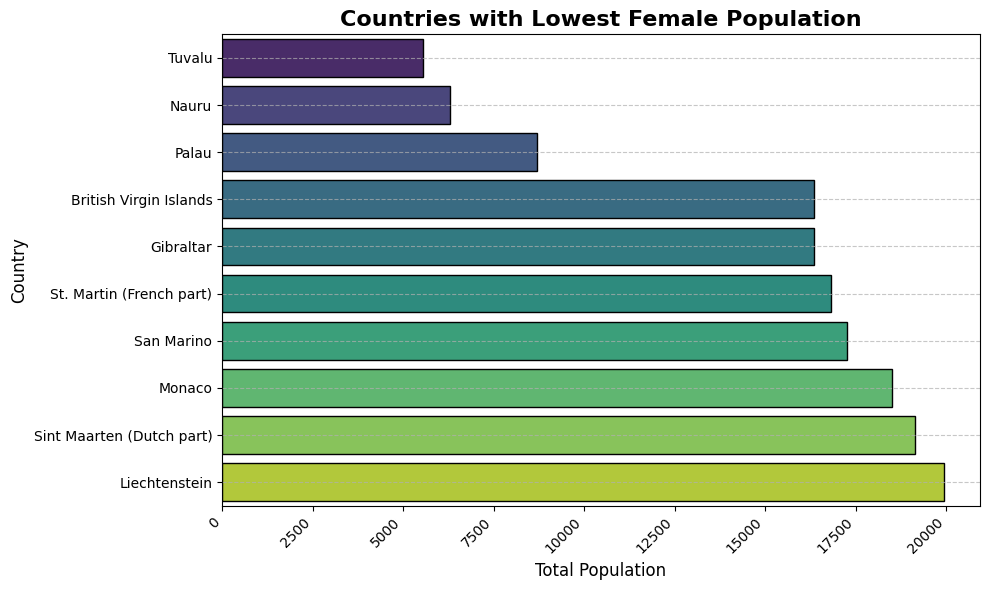

In [12]:
# Data for countries with highest Female population
highest_population = df[df['Indicator Code'] == 'SP.POP.TOTL.FE.IN'].nlargest(10, '2023')[['Country Name', '2023']]
highest_population.columns = ['Country', 'Population']

# Data for countries with lowest female population
lowest_population = df[df['Indicator Code'] == 'SP.POP.TOTL.FE.IN'].nsmallest(10, '2023')[['Country Name', '2023']]
lowest_population.columns = ['Country', 'Population']

# Plotting the data
v.plot_gender(highest_population, 'Countries with Highest Female Population', color='viridis', edgecolor='black')
v.plot_gender(lowest_population, 'Countries with Lowest Female Population', color='viridis', edgecolor='black')

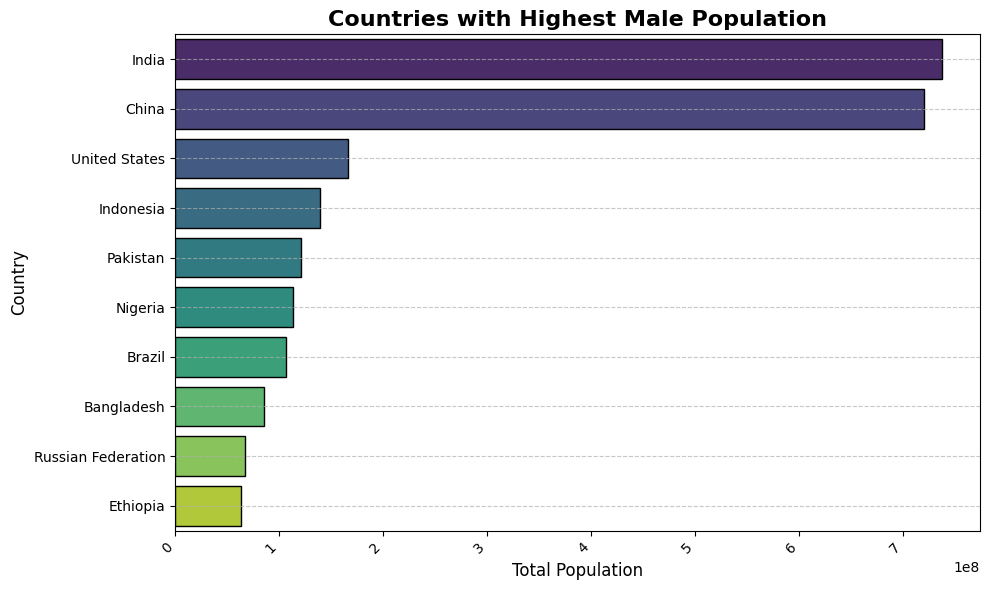

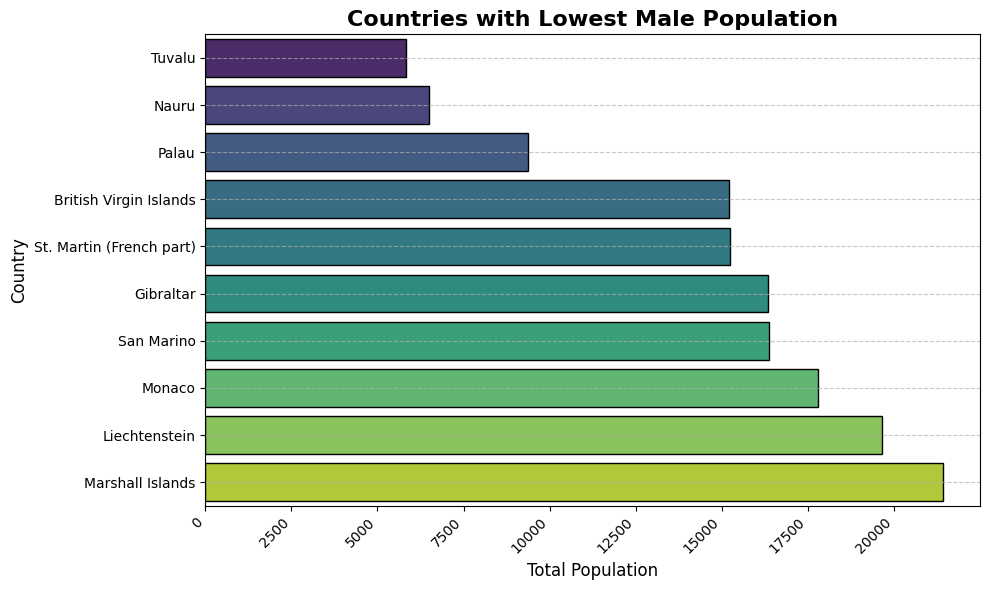

In [13]:
# Data for countries with highest Female population
highest_population = df[df['Indicator Code'] == 'SP.POP.TOTL.MA.IN'].nlargest(10, '2023')[['Country Name', '2023']]
highest_population.columns = ['Country', 'Population']

# Data for countries with lowest female population
lowest_population = df[df['Indicator Code'] == 'SP.POP.TOTL.MA.IN'].nsmallest(10, '2023')[['Country Name', '2023']]
lowest_population.columns = ['Country', 'Population']

# Plotting the data
v.plot_gender(highest_population, 'Countries with Highest Male Population', color='viridis', edgecolor='black')
v.plot_gender(lowest_population, 'Countries with Lowest Male Population', color='viridis', edgecolor='black')